In [ ]:
import pandas as pd
import numpy as np

In [ ]:

df=pd.read_csv('Boston.csv')
print(df)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

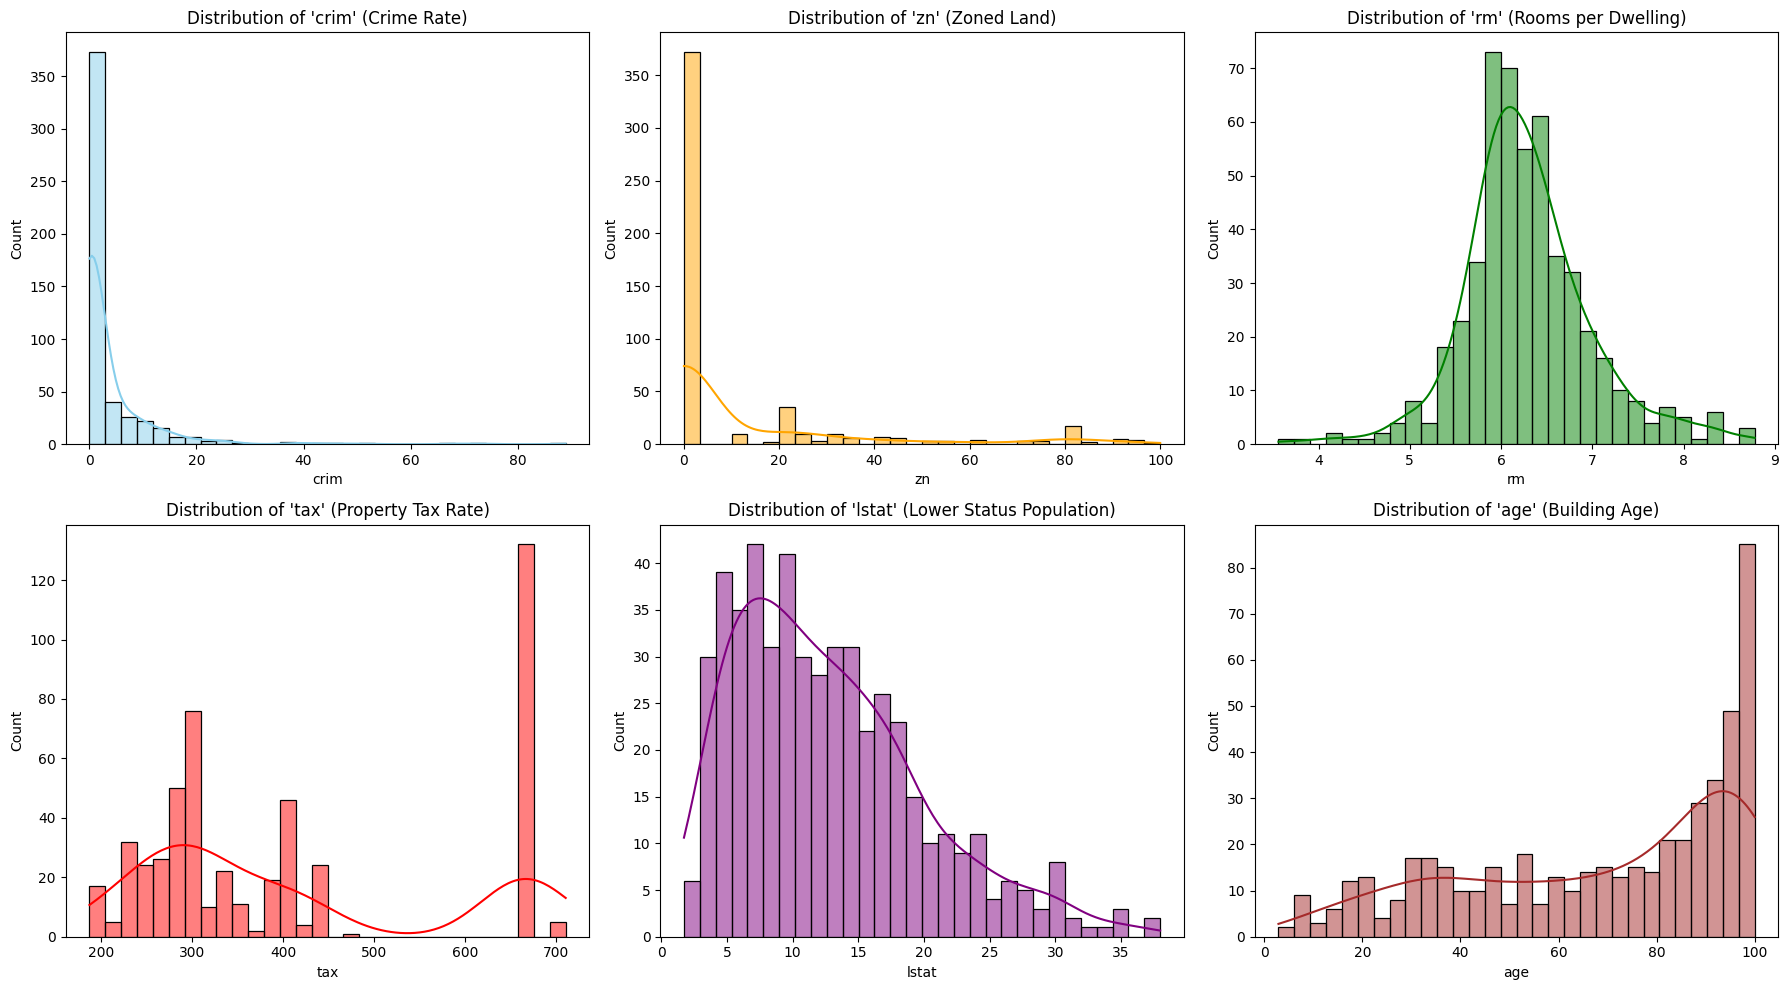

In [ ]:
# Plotting the distribution of important features in the dataset
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
# Feature: 'crim'
sns.histplot(df['crim'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Distribution of 'crim' (Crime Rate)")
# Feature: 'zn'
sns.histplot(df['zn'], bins=30, kde=True, color='orange', ax=axs[0, 1])
axs[0, 1].set_title("Distribution of 'zn' (Zoned Land)")
# Feature: 'rm'
sns.histplot(df['rm'], bins=30, kde=True, color='green', ax=axs[0, 2])
axs[0, 2].set_title("Distribution of 'rm' (Rooms per Dwelling)")
# Feature: 'tax'
sns.histplot(df['tax'], bins=30, kde=True, color='red', ax=axs[1, 0])
axs[1, 0].set_title("Distribution of 'tax' (Property Tax Rate)")
# Feature: 'lstat'
sns.histplot(df['lstat'], bins=30, kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_title("Distribution of 'lstat' (Lower Status Population)")
# Feature: 'age'
sns.histplot(df['age'], bins=30, kde=True, color='brown', ax=axs[1, 2])
axs[1, 2].set_title("Distribution of 'age' (Building Age)")
plt.tight_layout()
plt.show()


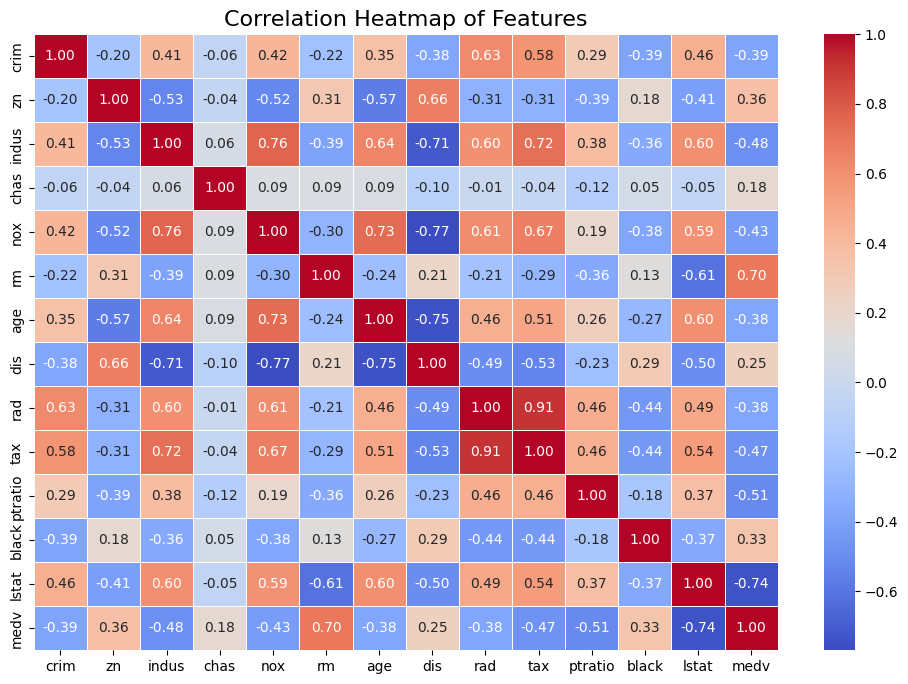

In [ ]:
# Computing the correlation matrix
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


In [ ]:

missing_values = df.isnull().sum()
missing_values


,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [ ]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


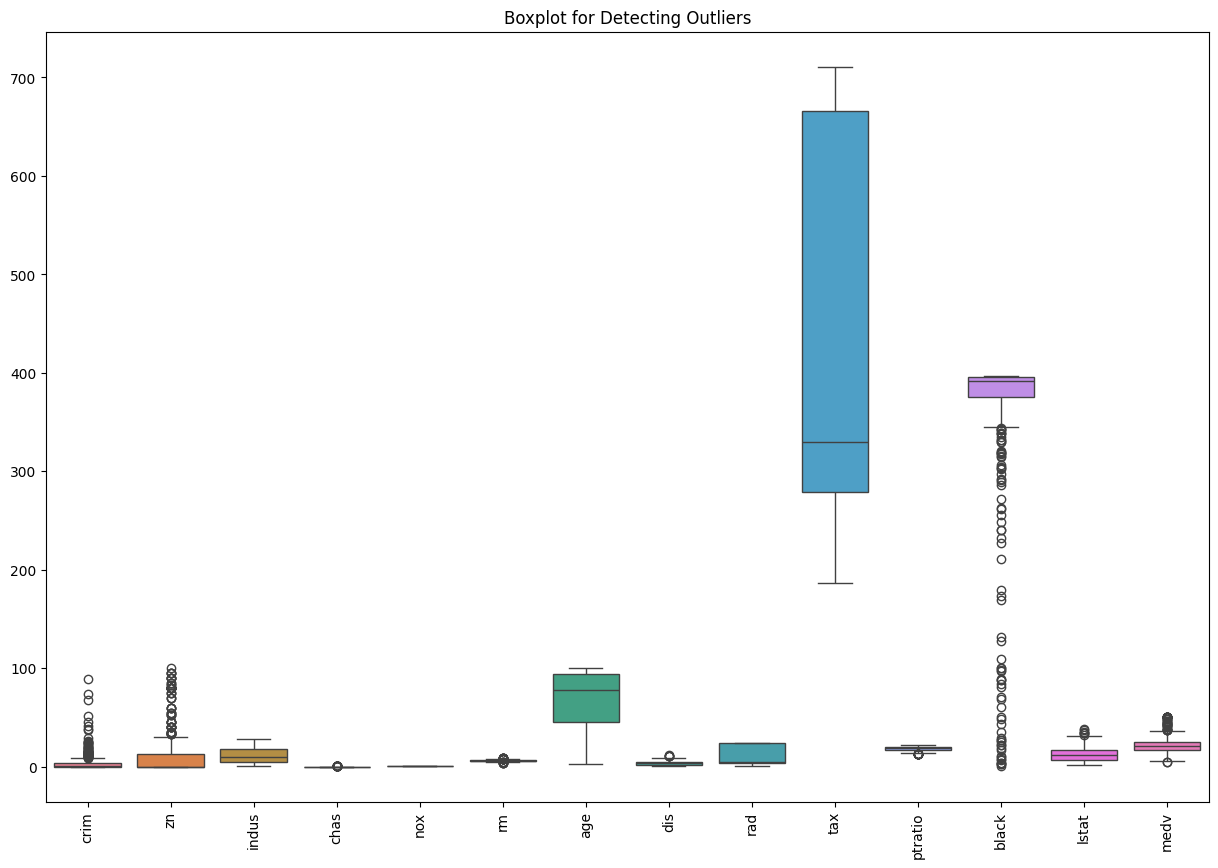

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Detecting Outliers")
plt.show()


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df.select_dtypes(include=['float64', 'int64']) < lower_bound) | (df.select_dtypes(include=['float64', 'int64']) > upper_bound))
df_no_outliers_iqr = df[~outliers_iqr.any(axis=1)]s
df.shape, df_no_outliers_iqr.shape


((506, 14), (268, 14))

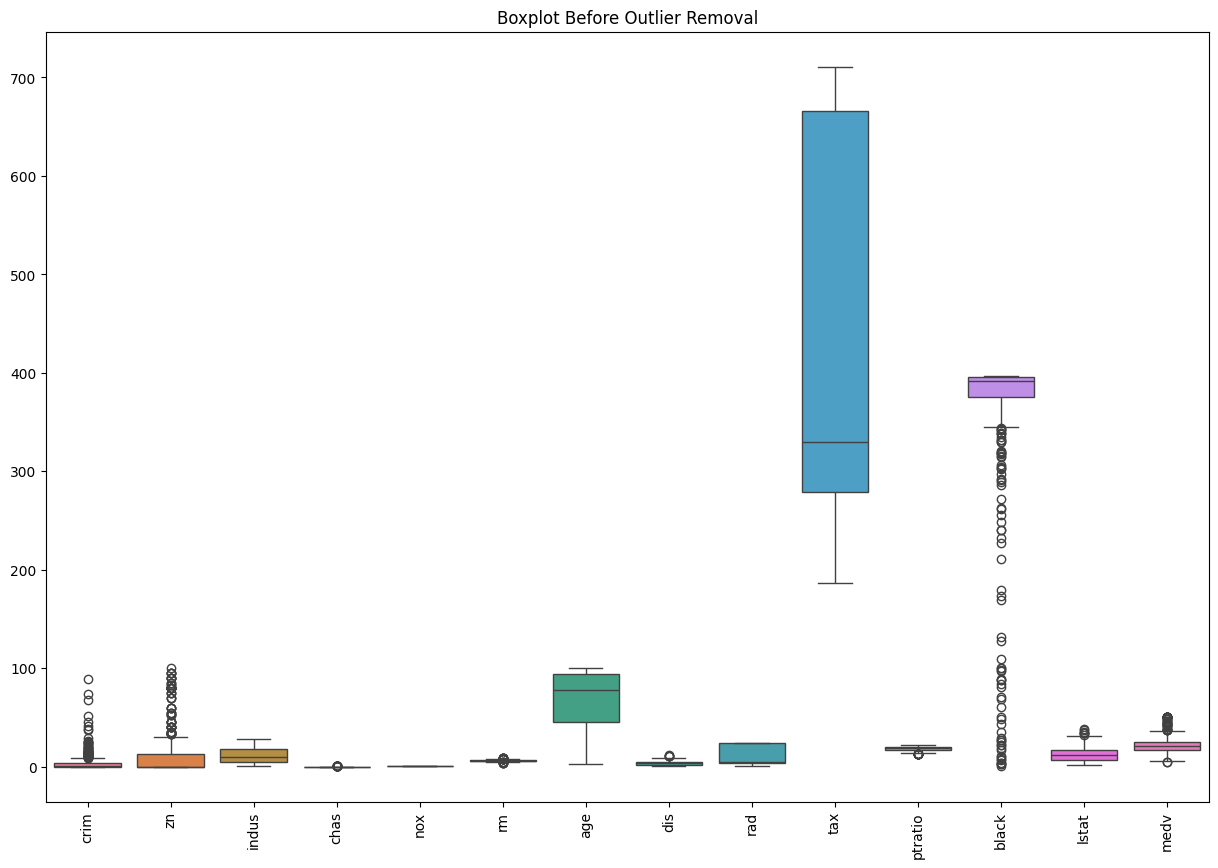

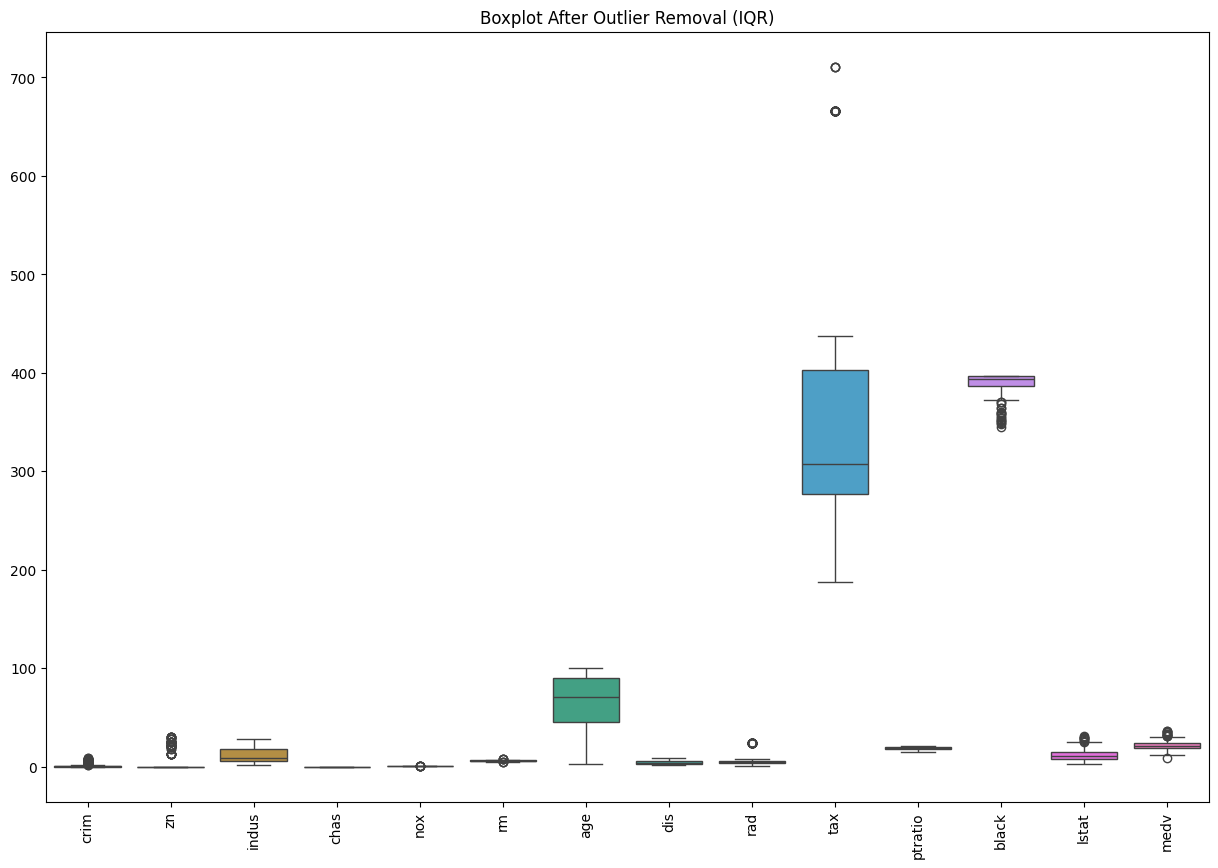

In [ ]:
# Plot boxplot before removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Removal")
plt.show()


# Plot boxplot after removing outliers using IQR method
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_no_outliers_iqr)
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal (IQR)")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
features_to_scale = df.drop(columns=['chas', 'medv'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_scaled['chas'] = df['chas']
df_scaled['medv'] = df['medv']
df_scaled.head()


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,chas,medv
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0,24.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0,21.6
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0,34.7
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0,33.4
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0,36.2


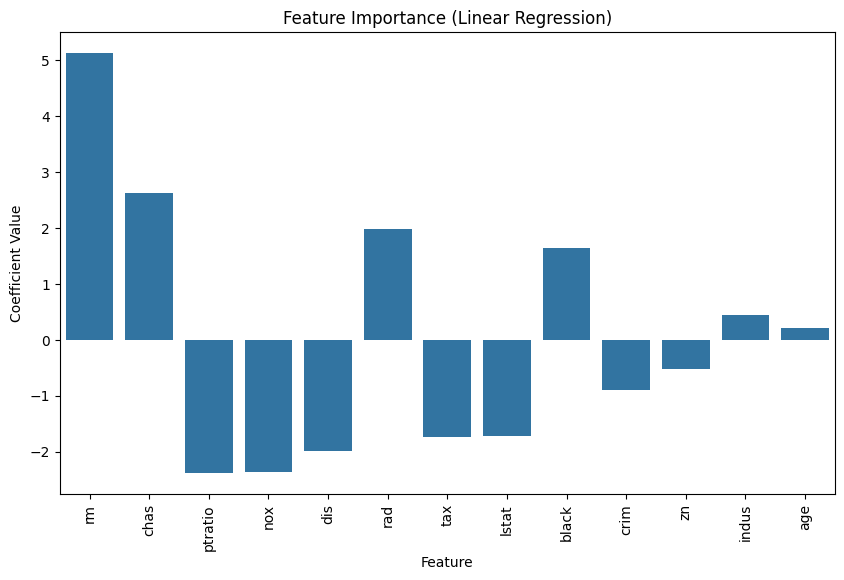

In [ ]:
# Extract the coefficients (feature importance)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coefficients["abs_coefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values("abs_coefficient", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients['Coefficient'])
plt.title("Feature Importance (Linear Regression)")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['medv', 'indus', 'age'])  # Remove features with low coefficient values
y = df_scaled['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((328, 11), (178, 11), (328,), (178,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 20.31
R² Score: 0.73


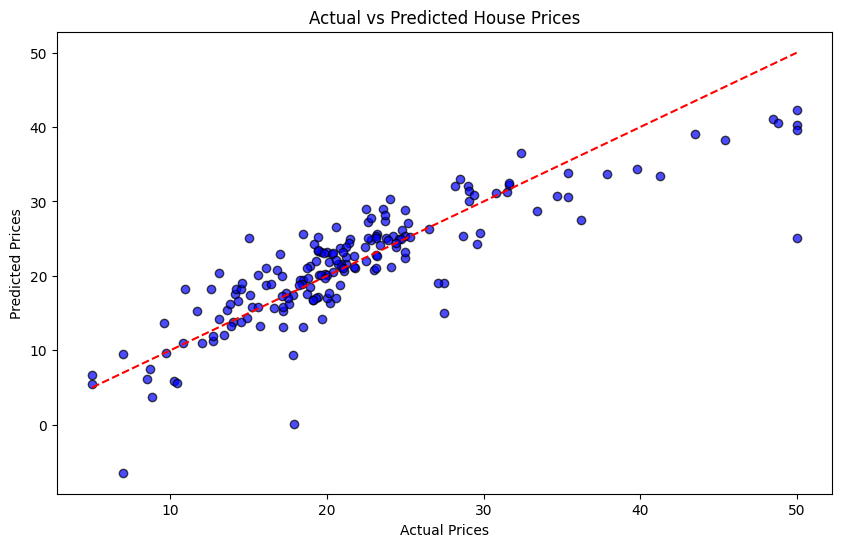

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


In [43]:
independent_vars = ["crim","zn","indus","nox","rm","age","dis","rad","tax","ptratio","black","lstat","chas"]

In [44]:
results = {}

for col in independent_vars:
    X = df[[col]]
    y = df["medv"]

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    # Store actual vs predicted for each feature
    results[col] = pd.DataFrame({
        "Actual_MEDV": y,
        "Predicted_MEDV": y_pred
    })

# Display result keys
list(results.keys())


['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'chas']

In [45]:
results["rm"]   # Example: show for RM


,Actual_MEDV,Predicted_MEDV
0,24.0,25.175746
1,21.6,23.774021
2,34.7,30.728032
3,33.4,29.025938
4,36.2,30.382152
...,...,...
501,22.4,25.339584
502,20.6,21.034286
503,23.9,28.825691
504,22.0,27.169108


In [46]:
for col in independent_vars:
    print("\n==============================")
    print(f"Feature: {col}")
    print(results[col])



Feature: crim
     Actual_MEDV  Predicted_MEDV
0           24.0       24.030482
1           21.6       24.021767
2           34.7       24.021776
3           33.4       24.019666
4           36.2       24.004437
..           ...             ...
501         22.4       24.007103
502         20.6       24.014311
503         23.9       24.007879
504         22.0       23.987605
505         11.9       24.013422

[506 rows x 2 columns]

Feature: zn
     Actual_MEDV  Predicted_MEDV
0           24.0       23.476099
1           21.6       20.917579
2           34.7       20.917579
3           33.4       20.917579
4           36.2       20.917579
..           ...             ...
501         22.4       20.917579
502         20.6       20.917579
503         23.9       20.917579
504         22.0       20.917579
505         11.9       20.917579

[506 rows x 2 columns]

Feature: indus
     Actual_MEDV  Predicted_MEDV
0           24.0       28.256884
1           21.6       25.170072
2           34.7 

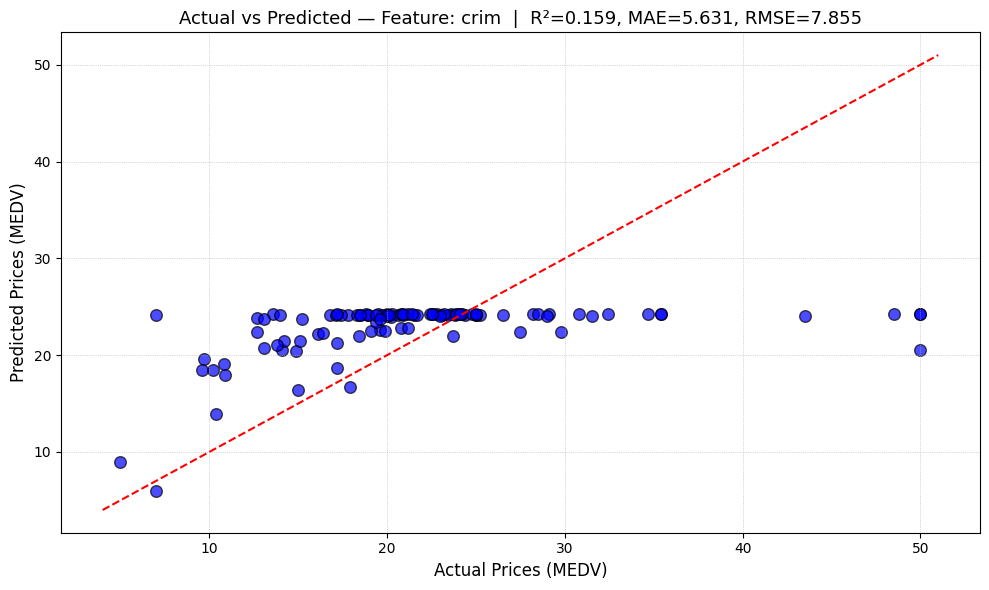

Saved plot: plots/crim_actual_vs_pred_test.png  |  feature=crim  R2=0.1587  MAE=5.6311  RMSE=7.8546



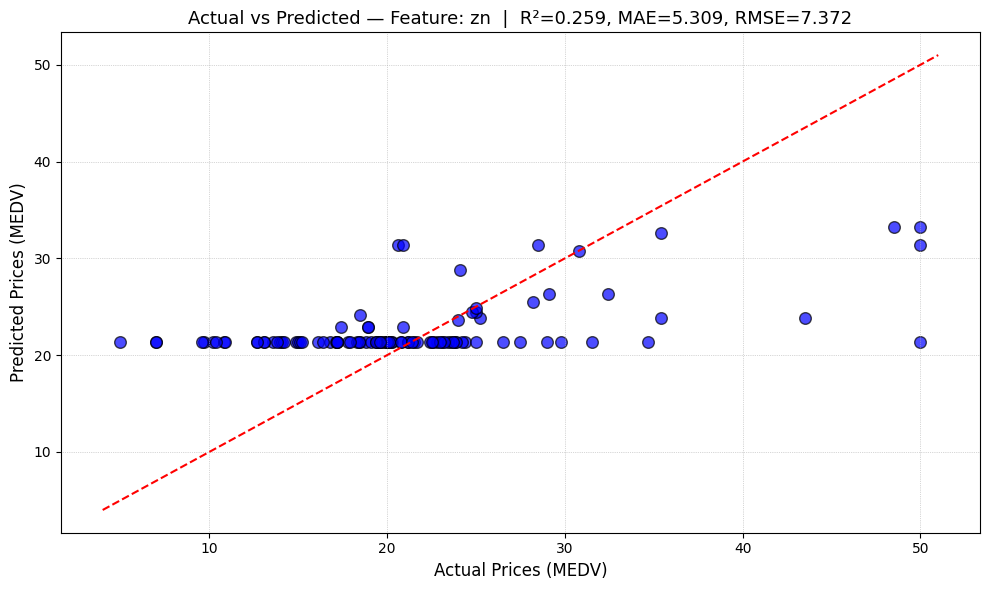

Saved plot: plots/zn_actual_vs_pred_test.png  |  feature=zn  R2=0.2589  MAE=5.3093  RMSE=7.3721



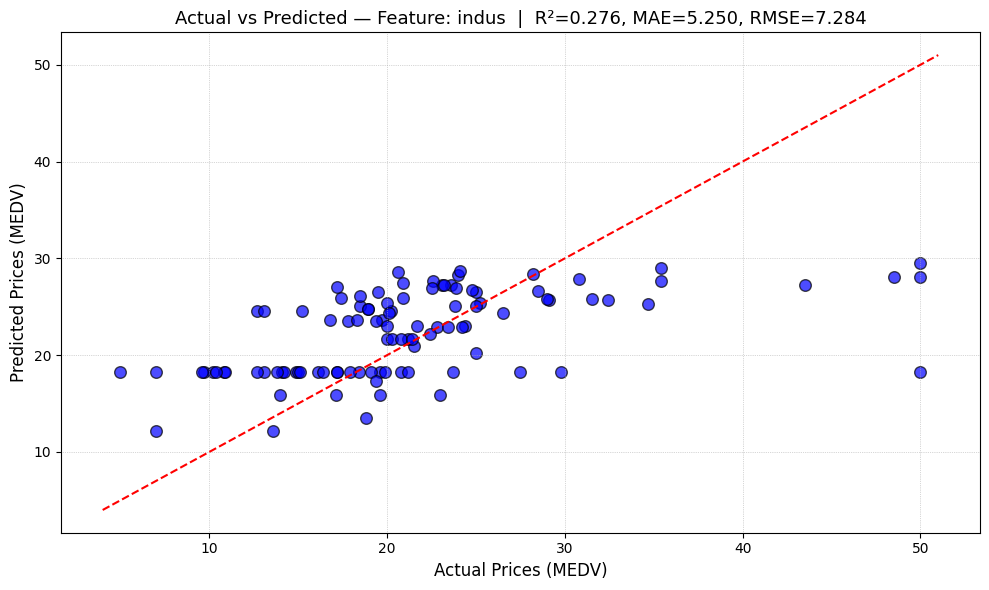

Saved plot: plots/indus_actual_vs_pred_test.png  |  feature=indus  R2=0.2764  MAE=5.2496  RMSE=7.2845



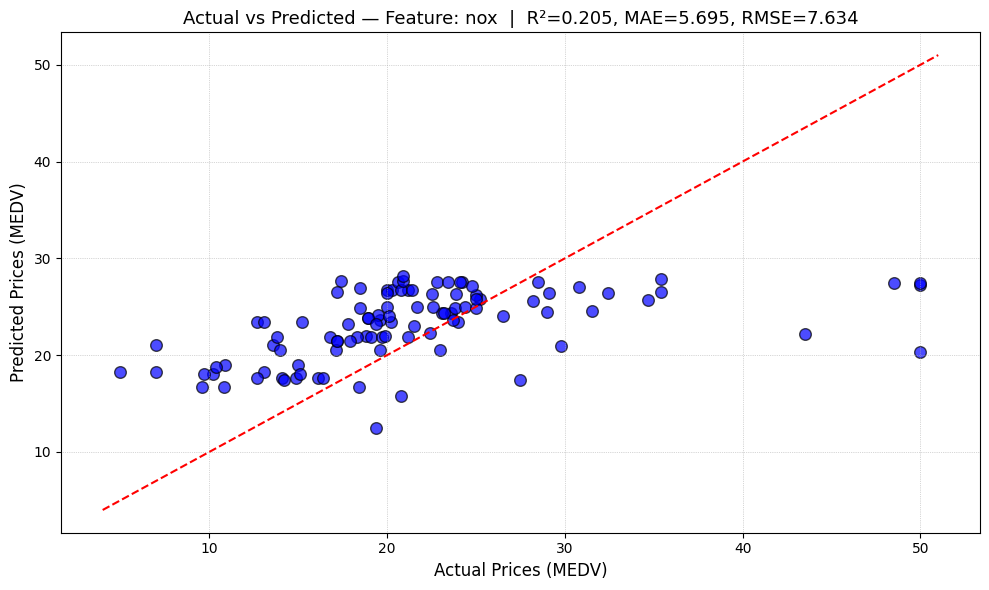

Saved plot: plots/nox_actual_vs_pred_test.png  |  feature=nox  R2=0.2052  MAE=5.6954  RMSE=7.6345



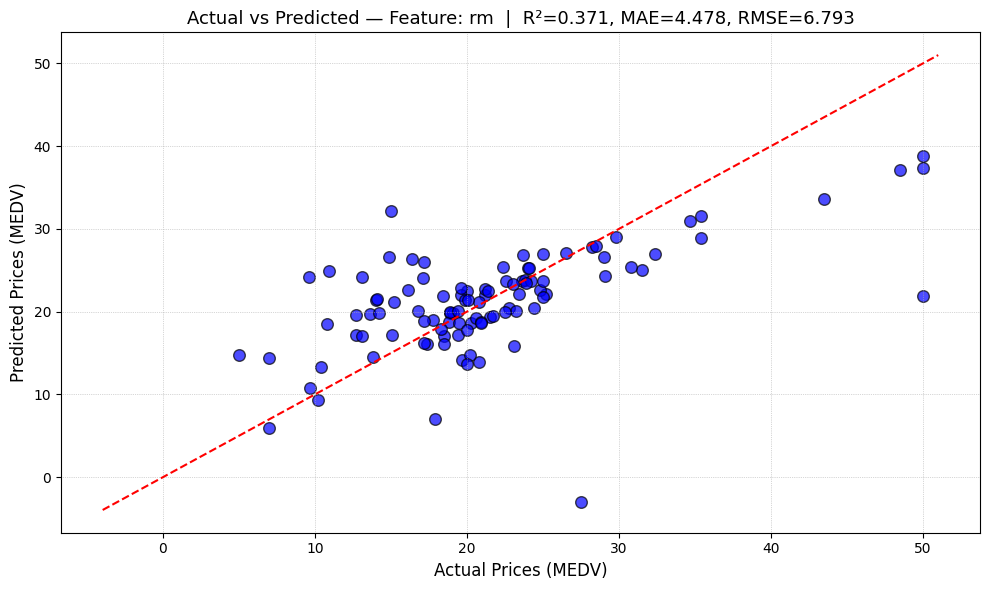

Saved plot: plots/rm_actual_vs_pred_test.png  |  feature=rm  R2=0.3708  MAE=4.4783  RMSE=6.7930



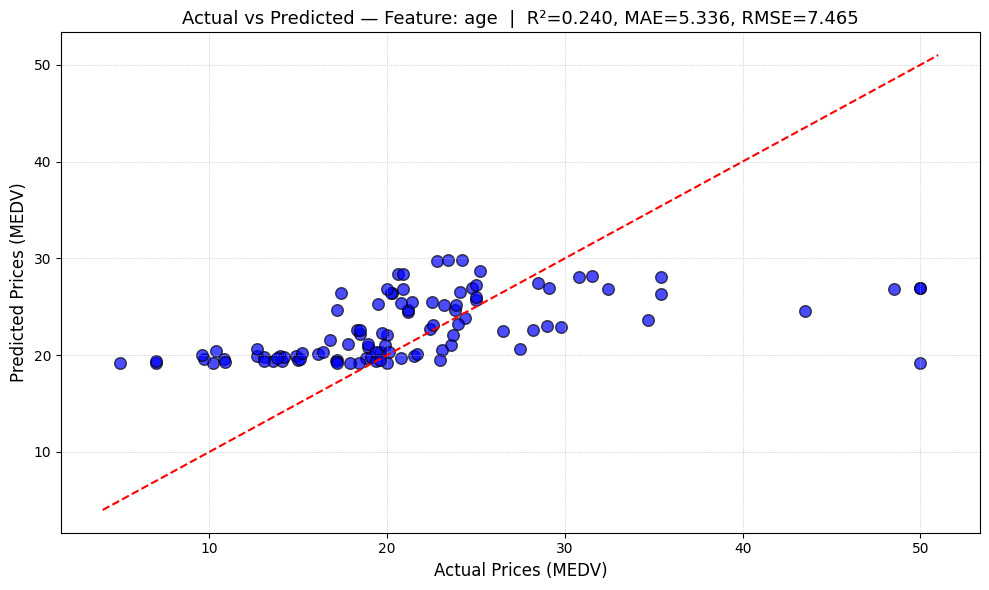

Saved plot: plots/age_actual_vs_pred_test.png  |  feature=age  R2=0.2400  MAE=5.3357  RMSE=7.4654



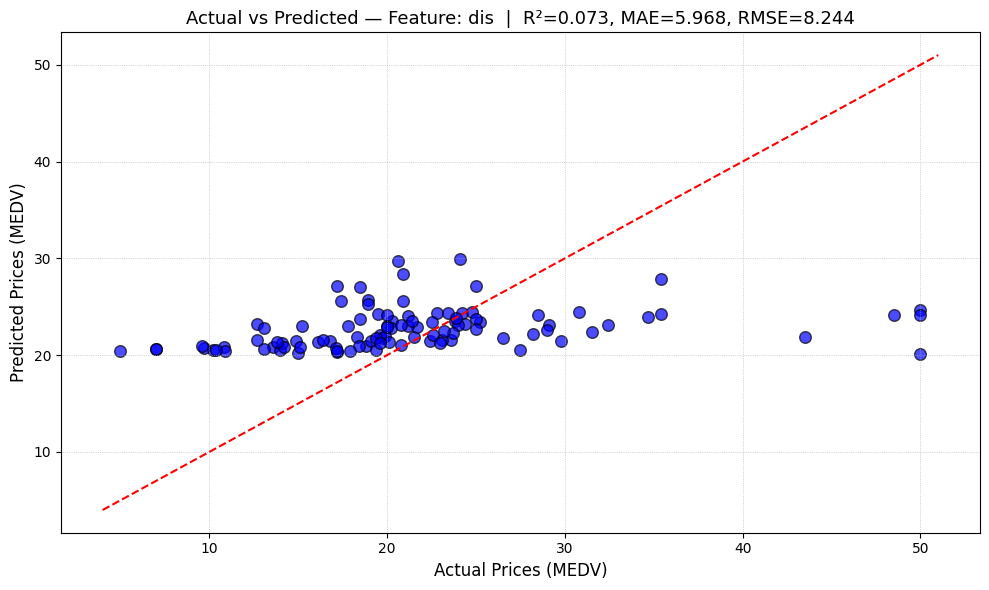

Saved plot: plots/dis_actual_vs_pred_test.png  |  feature=dis  R2=0.0733  MAE=5.9678  RMSE=8.2436



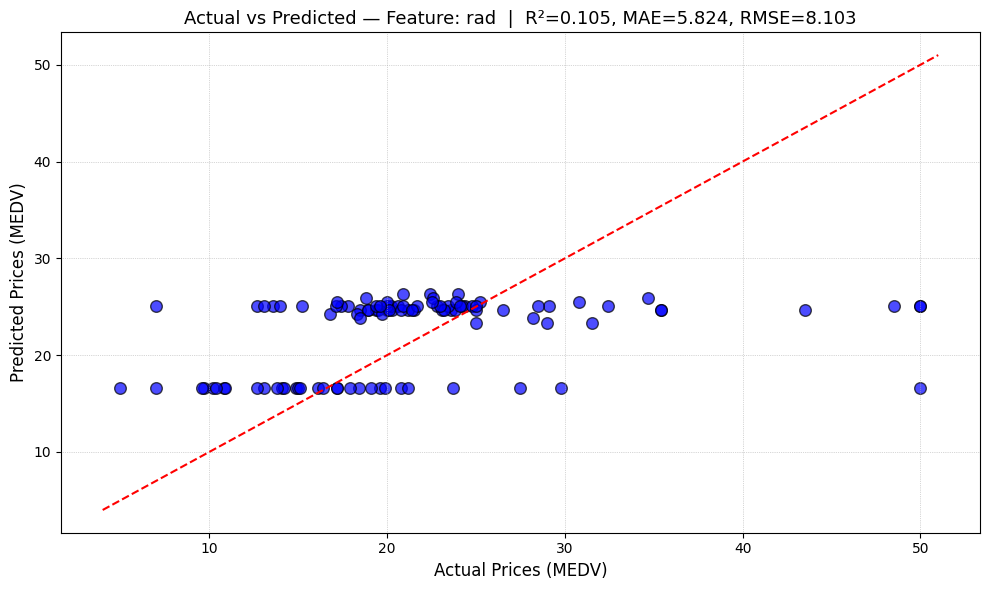

Saved plot: plots/rad_actual_vs_pred_test.png  |  feature=rad  R2=0.1048  MAE=5.8242  RMSE=8.1026



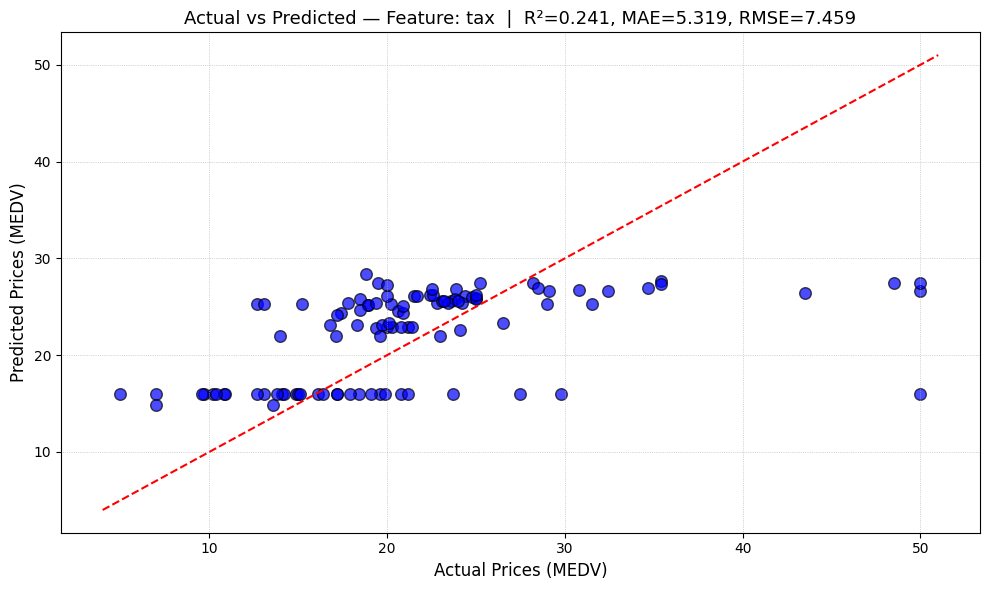

Saved plot: plots/tax_actual_vs_pred_test.png  |  feature=tax  R2=0.2413  MAE=5.3187  RMSE=7.4591



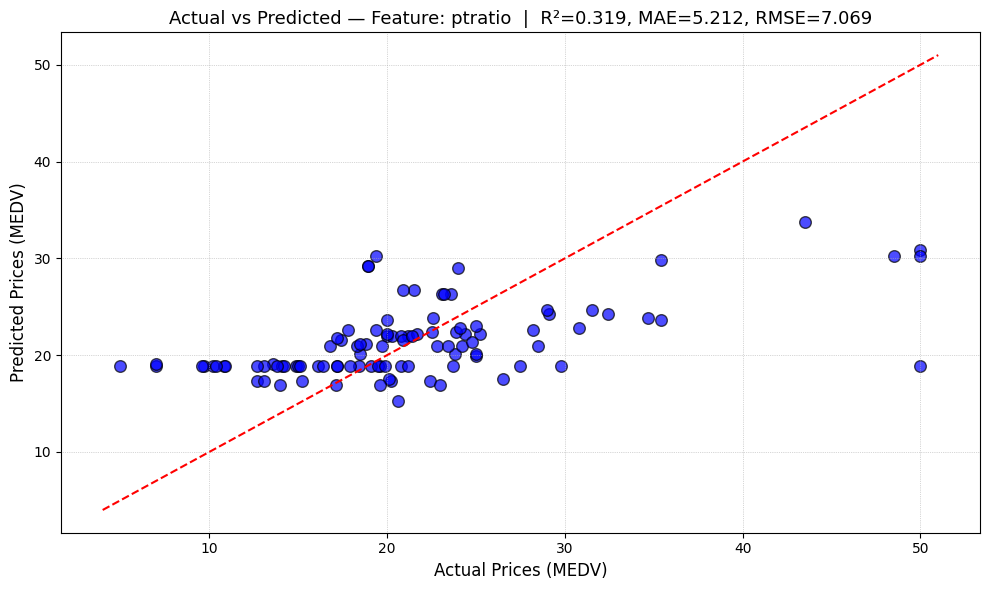

Saved plot: plots/ptratio_actual_vs_pred_test.png  |  feature=ptratio  R2=0.3185  MAE=5.2125  RMSE=7.0694



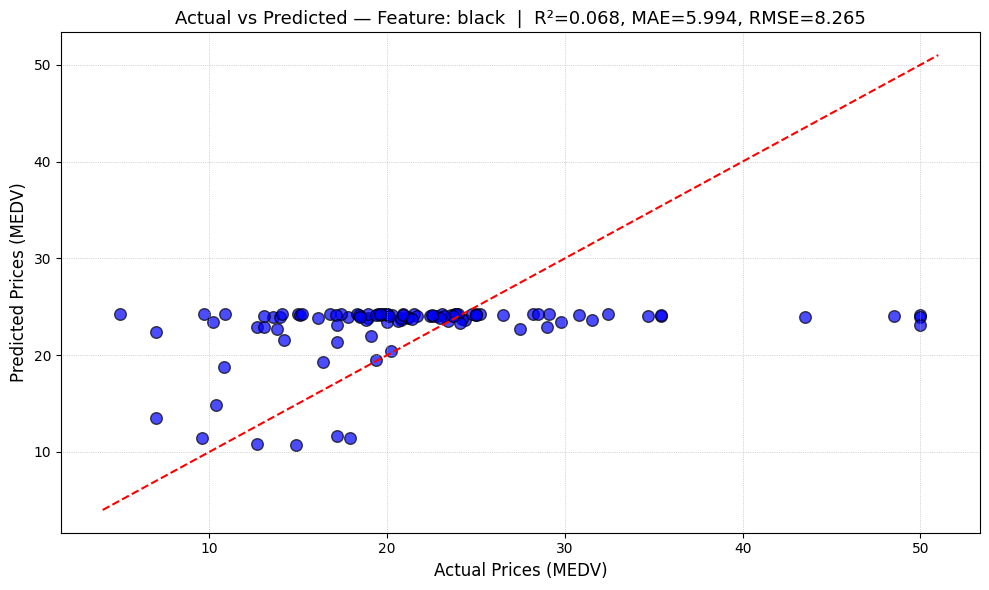

Saved plot: plots/black_actual_vs_pred_test.png  |  feature=black  R2=0.0684  MAE=5.9939  RMSE=8.2654



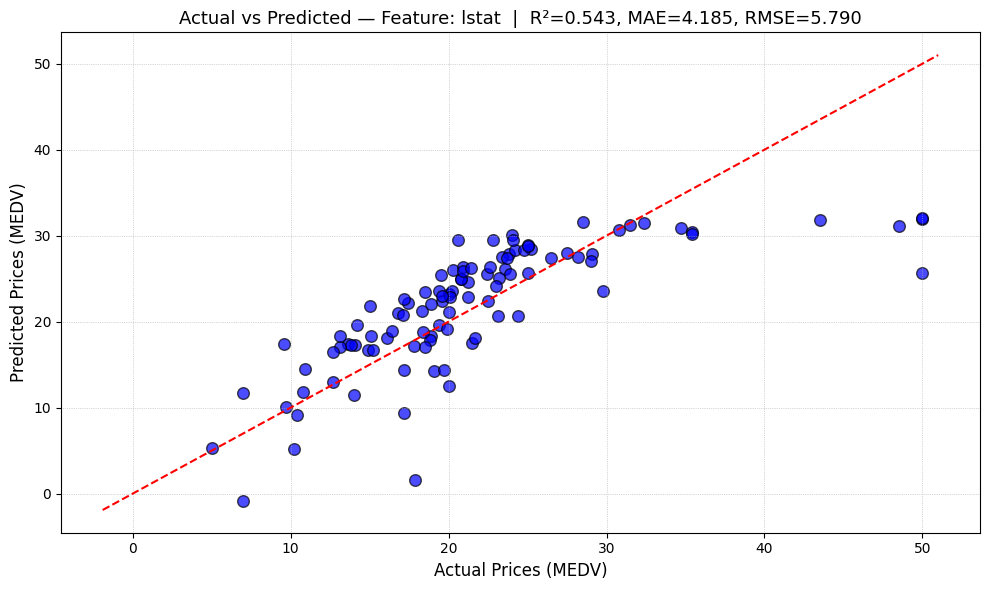

Saved plot: plots/lstat_actual_vs_pred_test.png  |  feature=lstat  R2=0.5429  MAE=4.1848  RMSE=5.7896



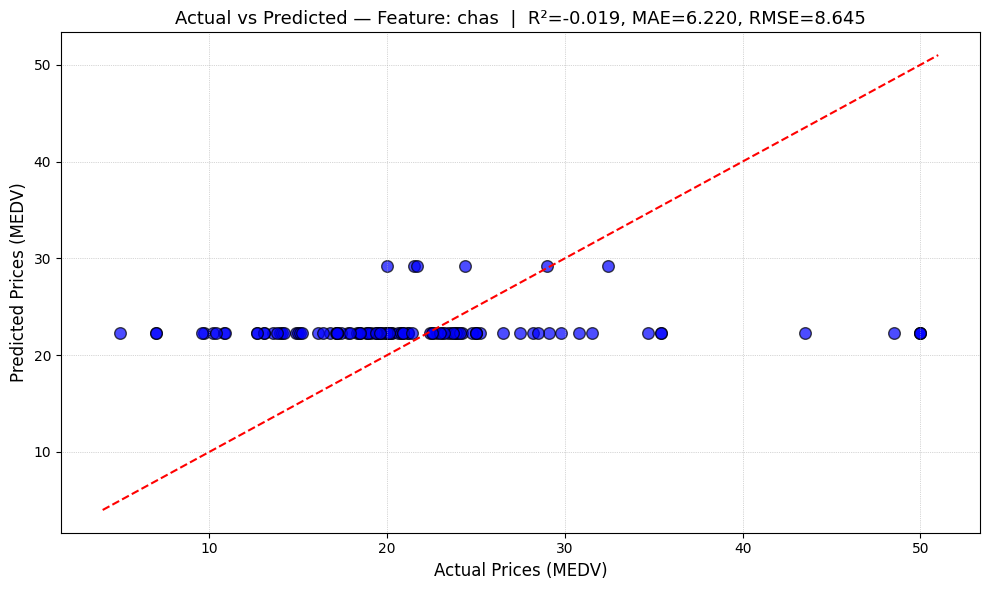

Saved plot: plots/chas_actual_vs_pred_test.png  |  feature=chas  R2=-0.0191  MAE=6.2196  RMSE=8.6449



In [52]:
# Cell 2: train/test per feature, metrics, plot & save

summary = []

# Settings
test_size = 0.2
random_state = 42

for col in independent_vars:
    X = df[[col]].values.reshape(-1, 1)   # feature as 2D array
    y = df["medv"].values                 # target

    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # FIXED RMSE

    # Plot Actual vs Predicted (test set)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=70, marker='o')

    # y = x reference line
    mins = min(y_test.min(), y_pred.min()) - 1
    maxs = max(y_test.max(), y_pred.max()) + 1
    plt.plot([mins, maxs], [mins, maxs], color='red', linestyle='--', linewidth=1.5)

    # labels and title
    plt.xlabel("Actual Prices (MEDV)", fontsize=12)
    plt.ylabel("Predicted Prices (MEDV)", fontsize=12)
    plt.title(f"Actual vs Predicted — Feature: {col}  |  R²={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}", fontsize=13)
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()

    # save
    filename = f"plots/{col}_actual_vs_pred_test.png"
    plt.savefig(filename, dpi=150)
    plt.show()

    # store summary info
    summary.append({
        "feature": col,
        "r2": r2,
        "mae": mae,
        "rmse": rmse,
        "coef": float(model.coef_[0]),
        "intercept": float(model.intercept_),
        "plot_file": filename
    })

    print(f"Saved plot: {filename}  |  feature={col}  R2={r2:.4f}  MAE={mae:.4f}  RMSE={rmse:.4f}\n")
